
# regresión lineal regular 

Datos sociodemográficos y de recursos de salud a nivel de condado de EE. UU. (2018-2019)
Se han recopilado datos sociodemográficos y de recursos de salud por condado en los Estados Unidos y queremos descubrir si existe alguna relación entre los recursos sanitarios y los datos sociodemográficos.

Para ello, es necesario que establezcas una variable objetivo (relacionada con la salud) para llevar a cabo el análisis.


me quedan los siguientes pasos 


5. Junto TRAIN y TEST para hacer un EDA completo
6. En el EDA, en el paso del análisis multivariante, analizo si todas las variables tienen correlación, o si hay algunas que podría descartar. En el caso de que
pudiera descartar, aplicaría de nuevo un feature selection (SelectKBest) para eliminarlas.
7. Listo para entrenar mi regresión lineal
8. Listo para entrenar mi L1 (regresión lineal regularizada de Lasso)

5. EDA

5.1 carga conjunto de datos 

In [1]:
import seaborn as sns

#import seaborn as sns
import pandas as pd

total_data = pd.read_csv("/workspaces/joseVent-linearregular/data/processed/total_data.csv")

print (total_data.head())

    TOT_POP      0-9   19-Oct    20-29    30-39    40-49    50-59    60-69  \
0   26625.0   3221.0   3463.0   2922.0   2829.0   2831.0   3831.0   3860.0   
1   51266.0   5272.0   5751.0   5137.0   5341.0   5880.0   7885.0   8271.0   
2   37779.0   3915.0   5118.0   6202.0   4363.0   4451.0   5107.0   4349.0   
3   91984.0  11163.0  12646.0  11595.0  11357.0  11444.0  12774.0  10791.0   
4  134487.0  16698.0  17666.0  17281.0  15993.0  15845.0  17982.0  16909.0   

     70-79     80+  ...  ICU Beds_x  Population Aged 60+  \
0   2460.0  1208.0  ...         0.0               7218.0   
1   4801.0  2928.0  ...         8.0              15253.0   
2   2713.0  1561.0  ...         6.0               8058.0   
3   6736.0  3478.0  ...         6.0              19479.0   
4  10074.0  6039.0  ...        32.0              31227.0   

   county_pop2018_18 and older  anycondition_number  Obesity_number  \
0                      20545.0              10213.0          7930.0   
1                      41304

5.2: EXPLORACIÓN Y LIMPIEZA DE DATOS 

sumarizamos con shape e info 

In [2]:
total_data.shape

(3140, 37)

In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 37 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TOT_POP                                               3140 non-null   float64
 1   0-9                                                   3140 non-null   float64
 2   19-Oct                                                3140 non-null   float64
 3   20-29                                                 3140 non-null   float64
 4   30-39                                                 3140 non-null   float64
 5   40-49                                                 3140 non-null   float64
 6   50-59                                                 3140 non-null   float64
 7   60-69                                                 3140 non-null   float64
 8   70-79                                                 3140

sin nulos, vamos a los duplicados 

In [4]:
total_data.duplicated().sum()
duplicados = total_data[total_data.duplicated(keep=False)]
print(duplicados)

Empty DataFrame
Columns: [TOT_POP, 0-9, 19-Oct, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80+, White-alone pop, Two or more races pop, POP_ESTIMATE_2018, Less than a high school diploma 2014-18, High school diploma only 2014-18, Some college or associate's degree 2014-18, Bachelor's degree or higher 2014-18, POVALL_2018, Civilian_labor_force_2018, Employed_2018, Unemployed_2018, Total nurse practitioners (2019), Total physician assistants (2019), Total Hospitals (2019), Internal Medicine Primary Care (2019), Family Medicine/General Practice Primary Care (2019), Total Specialist Physicians (2019), ICU Beds_x, Population Aged 60+, county_pop2018_18 and older, anycondition_number, Obesity_number, Heart disease_number, COPD_number, diabetes_number, CKD_number, Total Population]
Index: []

[0 rows x 37 columns]


In [5]:
if total_data.duplicated().sum():
    total_data = total_data.drop_duplicates()
print(total_data.shape)
total_data.head()

(3140, 37)


,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,ICU Beds_x,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Total Population
0,26625.0,3221.0,3463.0,2922.0,2829.0,2831.0,3831.0,3860.0,2460.0,1208.0,...,0.0,7218.0,20545.0,10213.0,7930.0,2072.0,2314.0,2823.0,771.0,55036
1,51266.0,5272.0,5751.0,5137.0,5341.0,5880.0,7885.0,8271.0,4801.0,2928.0,...,8.0,15253.0,41304.0,19282.0,13713.0,3796.0,4097.0,5416.0,1454.0,203360
2,37779.0,3915.0,5118.0,6202.0,4363.0,4451.0,5107.0,4349.0,2713.0,1561.0,...,6.0,8058.0,30379.0,14283.0,10238.0,2222.0,2792.0,3698.0,871.0,26201
3,91984.0,11163.0,12646.0,11595.0,11357.0,11444.0,12774.0,10791.0,6736.0,3478.0,...,6.0,19479.0,70506.0,33057.0,25735.0,5484.0,5716.0,7913.0,2118.0,22580
4,134487.0,16698.0,17666.0,17281.0,15993.0,15845.0,17982.0,16909.0,10074.0,6039.0,...,32.0,31227.0,103686.0,49754.0,38882.0,8686.0,10002.0,12987.0,3490.0,57667


In [6]:
total_data.duplicated().sum()

0

eliminacion de columnas irrelevantes. prefiero ser conservador y esperar al features selection 

5.3: ANALISIS VARIABLES UNIVARIANTE 

VARIABLES CATEGORICAS: 

In [7]:
total_data.info()

total_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 37 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TOT_POP                                               3140 non-null   float64
 1   0-9                                                   3140 non-null   float64
 2   19-Oct                                                3140 non-null   float64
 3   20-29                                                 3140 non-null   float64
 4   30-39                                                 3140 non-null   float64
 5   40-49                                                 3140 non-null   float64
 6   50-59                                                 3140 non-null   float64
 7   60-69                                                 3140 non-null   float64
 8   70-79                                                 3140

Index(['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80+', 'White-alone pop', 'Two or more races pop',
       'POP_ESTIMATE_2018', 'Less than a high school diploma 2014-18',
       'High school diploma only 2014-18',
       'Some college or associate's degree 2014-18',
       'Bachelor's degree or higher 2014-18', 'POVALL_2018',
       'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
       'Total nurse practitioners (2019)', 'Total physician assistants (2019)',
       'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)',
       'Family Medicine/General Practice Primary Care (2019)',
       'Total Specialist Physicians (2019)', 'ICU Beds_x',
       'Population Aged 60+', 'county_pop2018_18 and older',
       'anycondition_number', 'Obesity_number', 'Heart disease_number',
       'COPD_number', 'diabetes_number', 'CKD_number', 'Total Population'],
      dtype='object')

he factorizado todas, las analizaré como numéricas 

var = ['0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79','80+', 'White-alone pop', 'Two or more races pop', 'GQ_ESTIMATES_2018','Less than a high school diploma 2014-18','High school diploma only 2014-18','Some college or associate's degree 2014-18','Bachelor's degree or higher 2014-18', 'POVALL_2018',
'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018','Total nurse practitioners (2019)', 'Total physician assistants (2019)','Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)','Family Medicine/General Practice Primary Care (2019)','Total Specialist Physicians (2019)', 'ICU Beds_x', 'Total Population','Population Aged 60+', 'county_pop2018_18 and older','anycondition_number', 'Obesity_number', 'Heart disease_number','COPD_number', 'diabetes_number', 'CKD_number', 'POP_TOT']

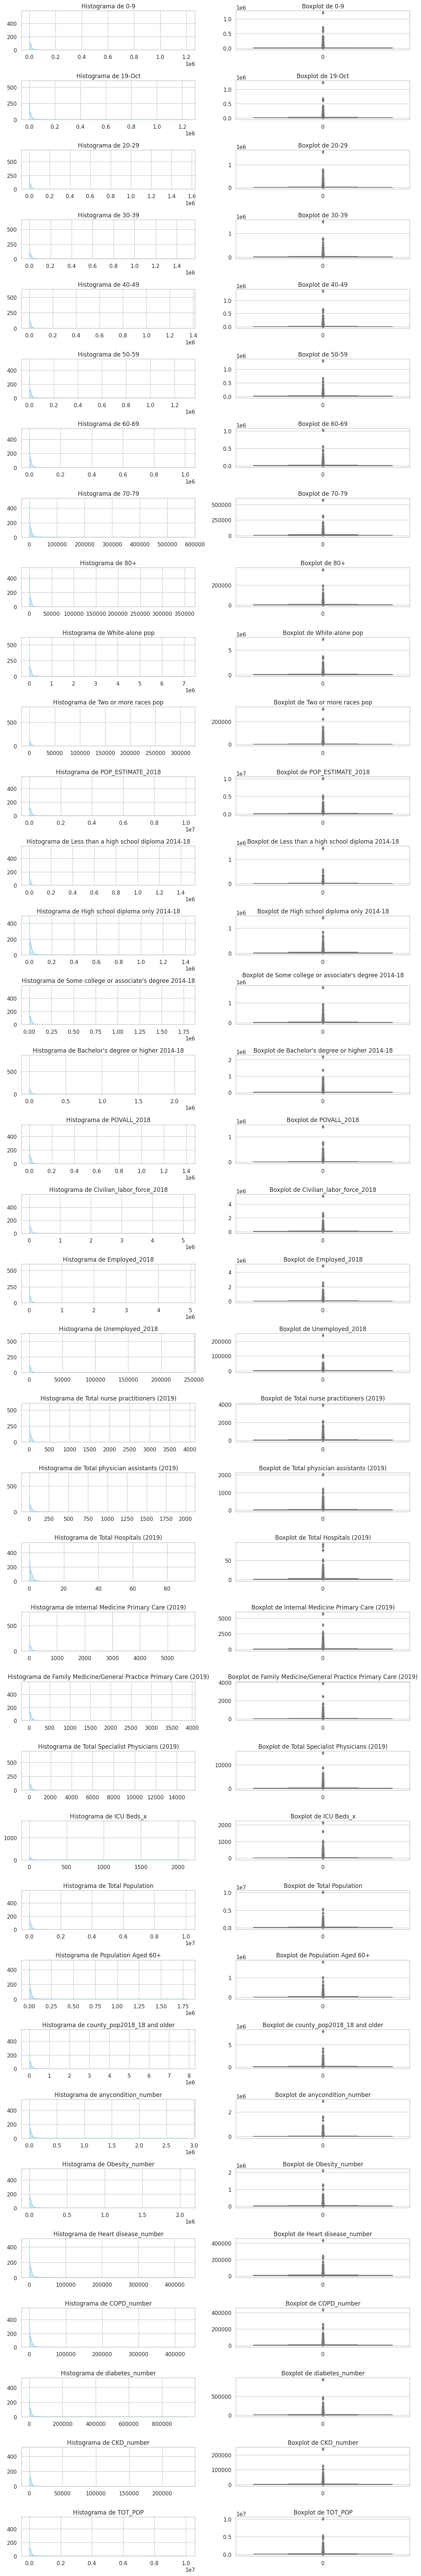

In [8]:
"""
var = ['0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79','80+', 'White-alone pop', 'Two or more races pop', 'GQ_ESTIMATES_2018','Less than a high school diploma 2014-18','High school diploma only 2014-18','Some college or associate's degree 2014-18','Bachelor's degree or higher 2014-18', 'POVALL_2018',
'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018','Total nurse practitioners (2019)', 'Total physician assistants (2019)','Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)','Family Medicine/General Practice Primary Care (2019)','Total Specialist Physicians (2019)', 'ICU Beds_x', 'Total Population','Population Aged 60+', 'county_pop2018_18 and older','anycondition_number', 'Obesity_number', 'Heart disease_number','COPD_number', 'diabetes_number', 'CKD_number', 'POP_TOT']

"""

import seaborn as sns
import matplotlib.pyplot as plt

# Lista de columnas para los gráficos
columnas_graficos = ['0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+',
                     'White-alone pop', 'Two or more races pop', 'POP_ESTIMATE_2018',
                     'Less than a high school diploma 2014-18', 'High school diploma only 2014-18',
                     "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18",
                     'POVALL_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
                     'Total nurse practitioners (2019)', 'Total physician assistants (2019)',
                     'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)',
                     'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)',
                     'ICU Beds_x', 'Total Population', 'Population Aged 60+', 'county_pop2018_18 and older',
                     'anycondition_number', 'Obesity_number', 'Heart disease_number', 'COPD_number',
                     'diabetes_number', 'CKD_number', 'TOT_POP']

# Configurar estilo del gráfico con Seaborn
sns.set(style="whitegrid", palette="pastel")

# Crear subplots para los gráficos
fig, axes = plt.subplots(nrows=len(columnas_graficos), ncols=2, figsize=(12, 2*len(columnas_graficos)))

# Crear gráficos para cada variable
for i, columna in enumerate(columnas_graficos):
    # Histograma
    sns.histplot(data=total_data[columna], kde=True, color="skyblue", ax=axes[i, 0])
    axes[i, 0].set_xlabel(None)
    axes[i, 0].set_ylabel(None)
    axes[i, 0].set_title(f"Histograma de {columna}")

    # Boxplot
    sns.boxplot(data=total_data[columna], color="lightblue", showfliers=True, ax=axes[i, 1])
    axes[i, 1].set_xlabel(None)
    axes[i, 1].set_title(f"Boxplot de {columna}")

plt.tight_layout()
plt.show()





parece que hay bastantes outliers

5.4 ANALISIS DE VARIABLES MULTIVARIANTE 

analizo las variables de edades

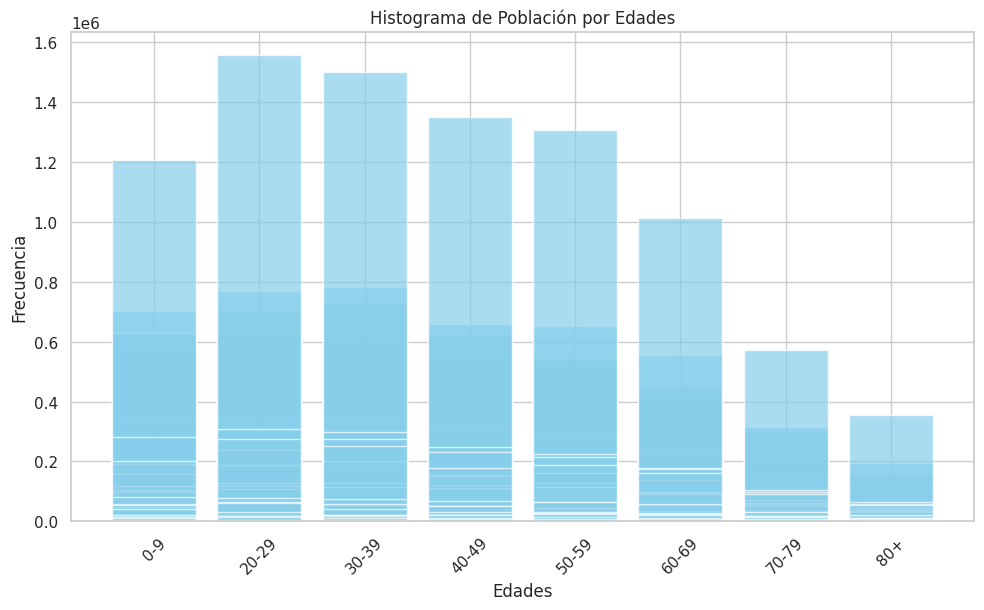

In [10]:
import matplotlib.pyplot as plt

# Columnas de población que quieres visualizar en el mismo histograma
columnas_poblacion = ["0-9", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"]

# Crear una figura y ejes para el histograma
fig, ax = plt.subplots(figsize=(10, 6))

# Lista para almacenar las edades y frecuencias
edades = []
frecuencias = []

# Obtener las edades y frecuencias de cada columna
for col in columnas_poblacion:
    edades.extend([col] * len(total_data[col]))
    frecuencias.extend(total_data[col])

# Crear el histograma con Matplotlib
ax.bar(edades, frecuencias, color='skyblue', alpha=0.7)

# Configurar etiquetas y títulos
ax.set_title("Histograma de Población por Edades")
ax.set_xlabel("Edades")
ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad
plt.show()



ahora relacion entre enfermedades y total poblacion 

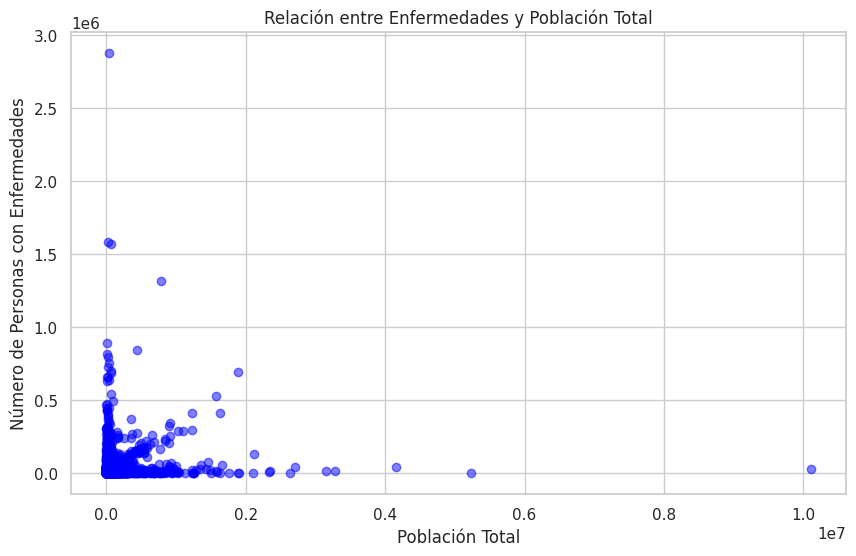

In [12]:
import matplotlib.pyplot as plt

# Crear el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(total_data["Total Population"], total_data["anycondition_number"], color='blue', alpha=0.5)

# Configurar etiquetas y títulos
plt.xlabel("Población Total")
plt.ylabel("Número de Personas con Enfermedades")
plt.title("Relación entre Enfermedades y Población Total")

plt.show()

porcentaje menor de poblacion está muy enfermo. Normal en sistema de salud que funcione 

ahora entre enfermedades y poblacion 

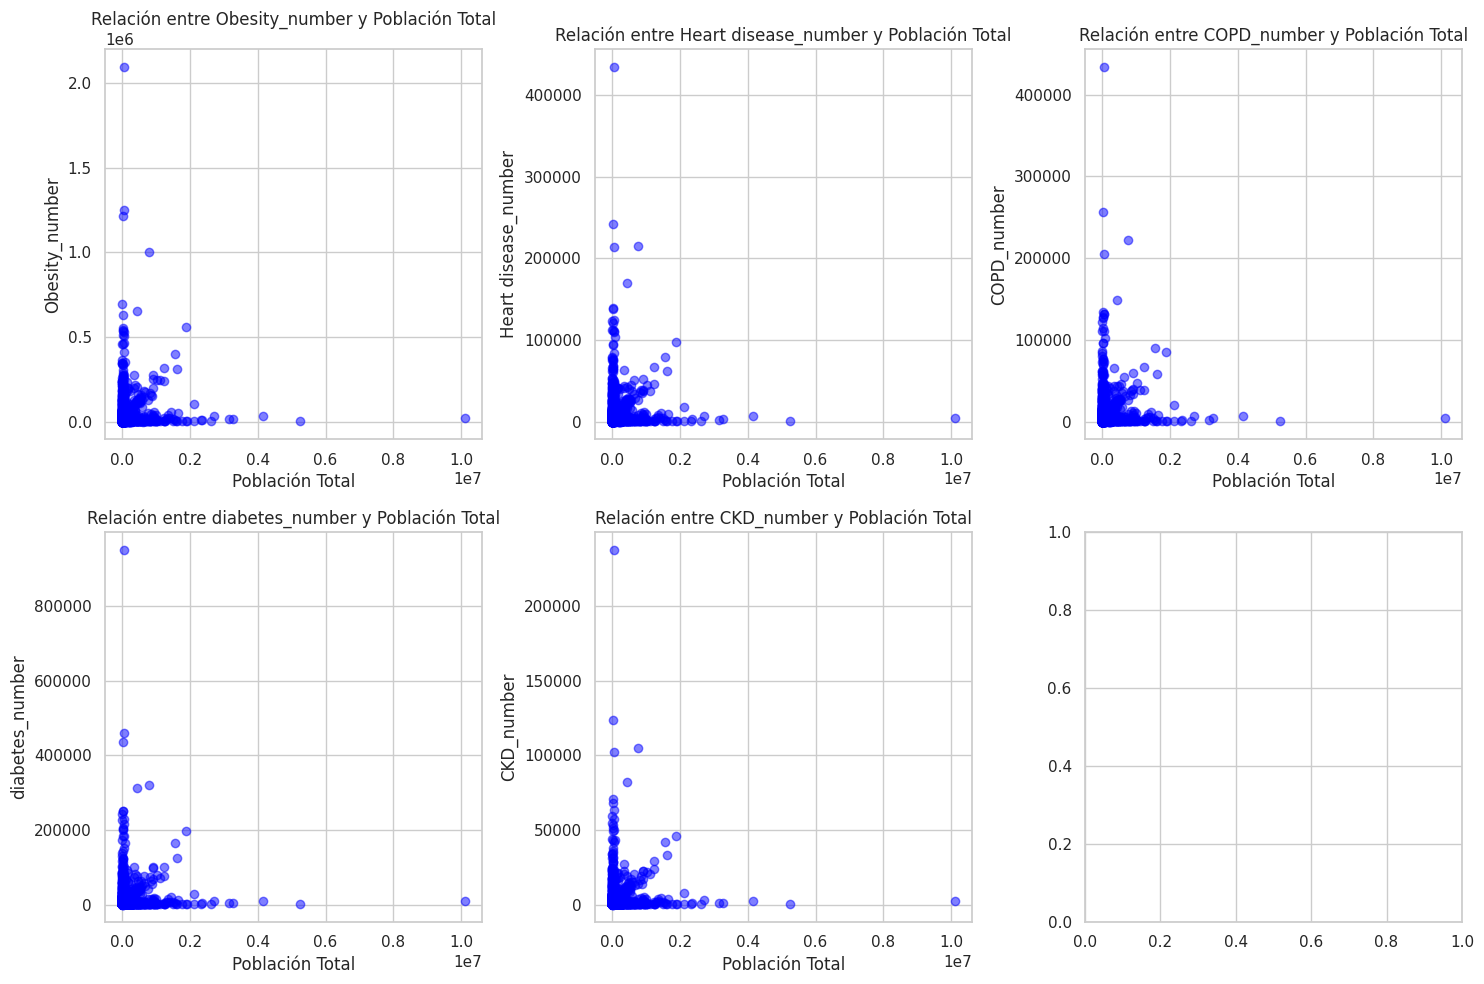

In [14]:
import matplotlib.pyplot as plt

# Columnas para la relación
columnas_enfermedades = ["Obesity_number", "Heart disease_number", "COPD_number", "diabetes_number", "CKD_number"]

# Crear el scatter plot con subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Convertir los subplots en un array 1D para facilitar el acceso
axes = axes.flatten()

# Crear un scatter plot para cada enfermedad y la población total
for i, enfermedad in enumerate(columnas_enfermedades):
    axes[i].scatter(total_data["Total Population"], total_data[enfermedad], color='blue', alpha=0.5)
    axes[i].set_xlabel("Población Total")
    axes[i].set_ylabel(enfermedad)
    axes[i].set_title(f"Relación entre {enfermedad} y Población Total")

# Ajustar el layout para una mejor visualización
plt.tight_layout()

plt.show()


diabetes impacta especialmente. 

veo el analisis de correlaciones entre variables. 

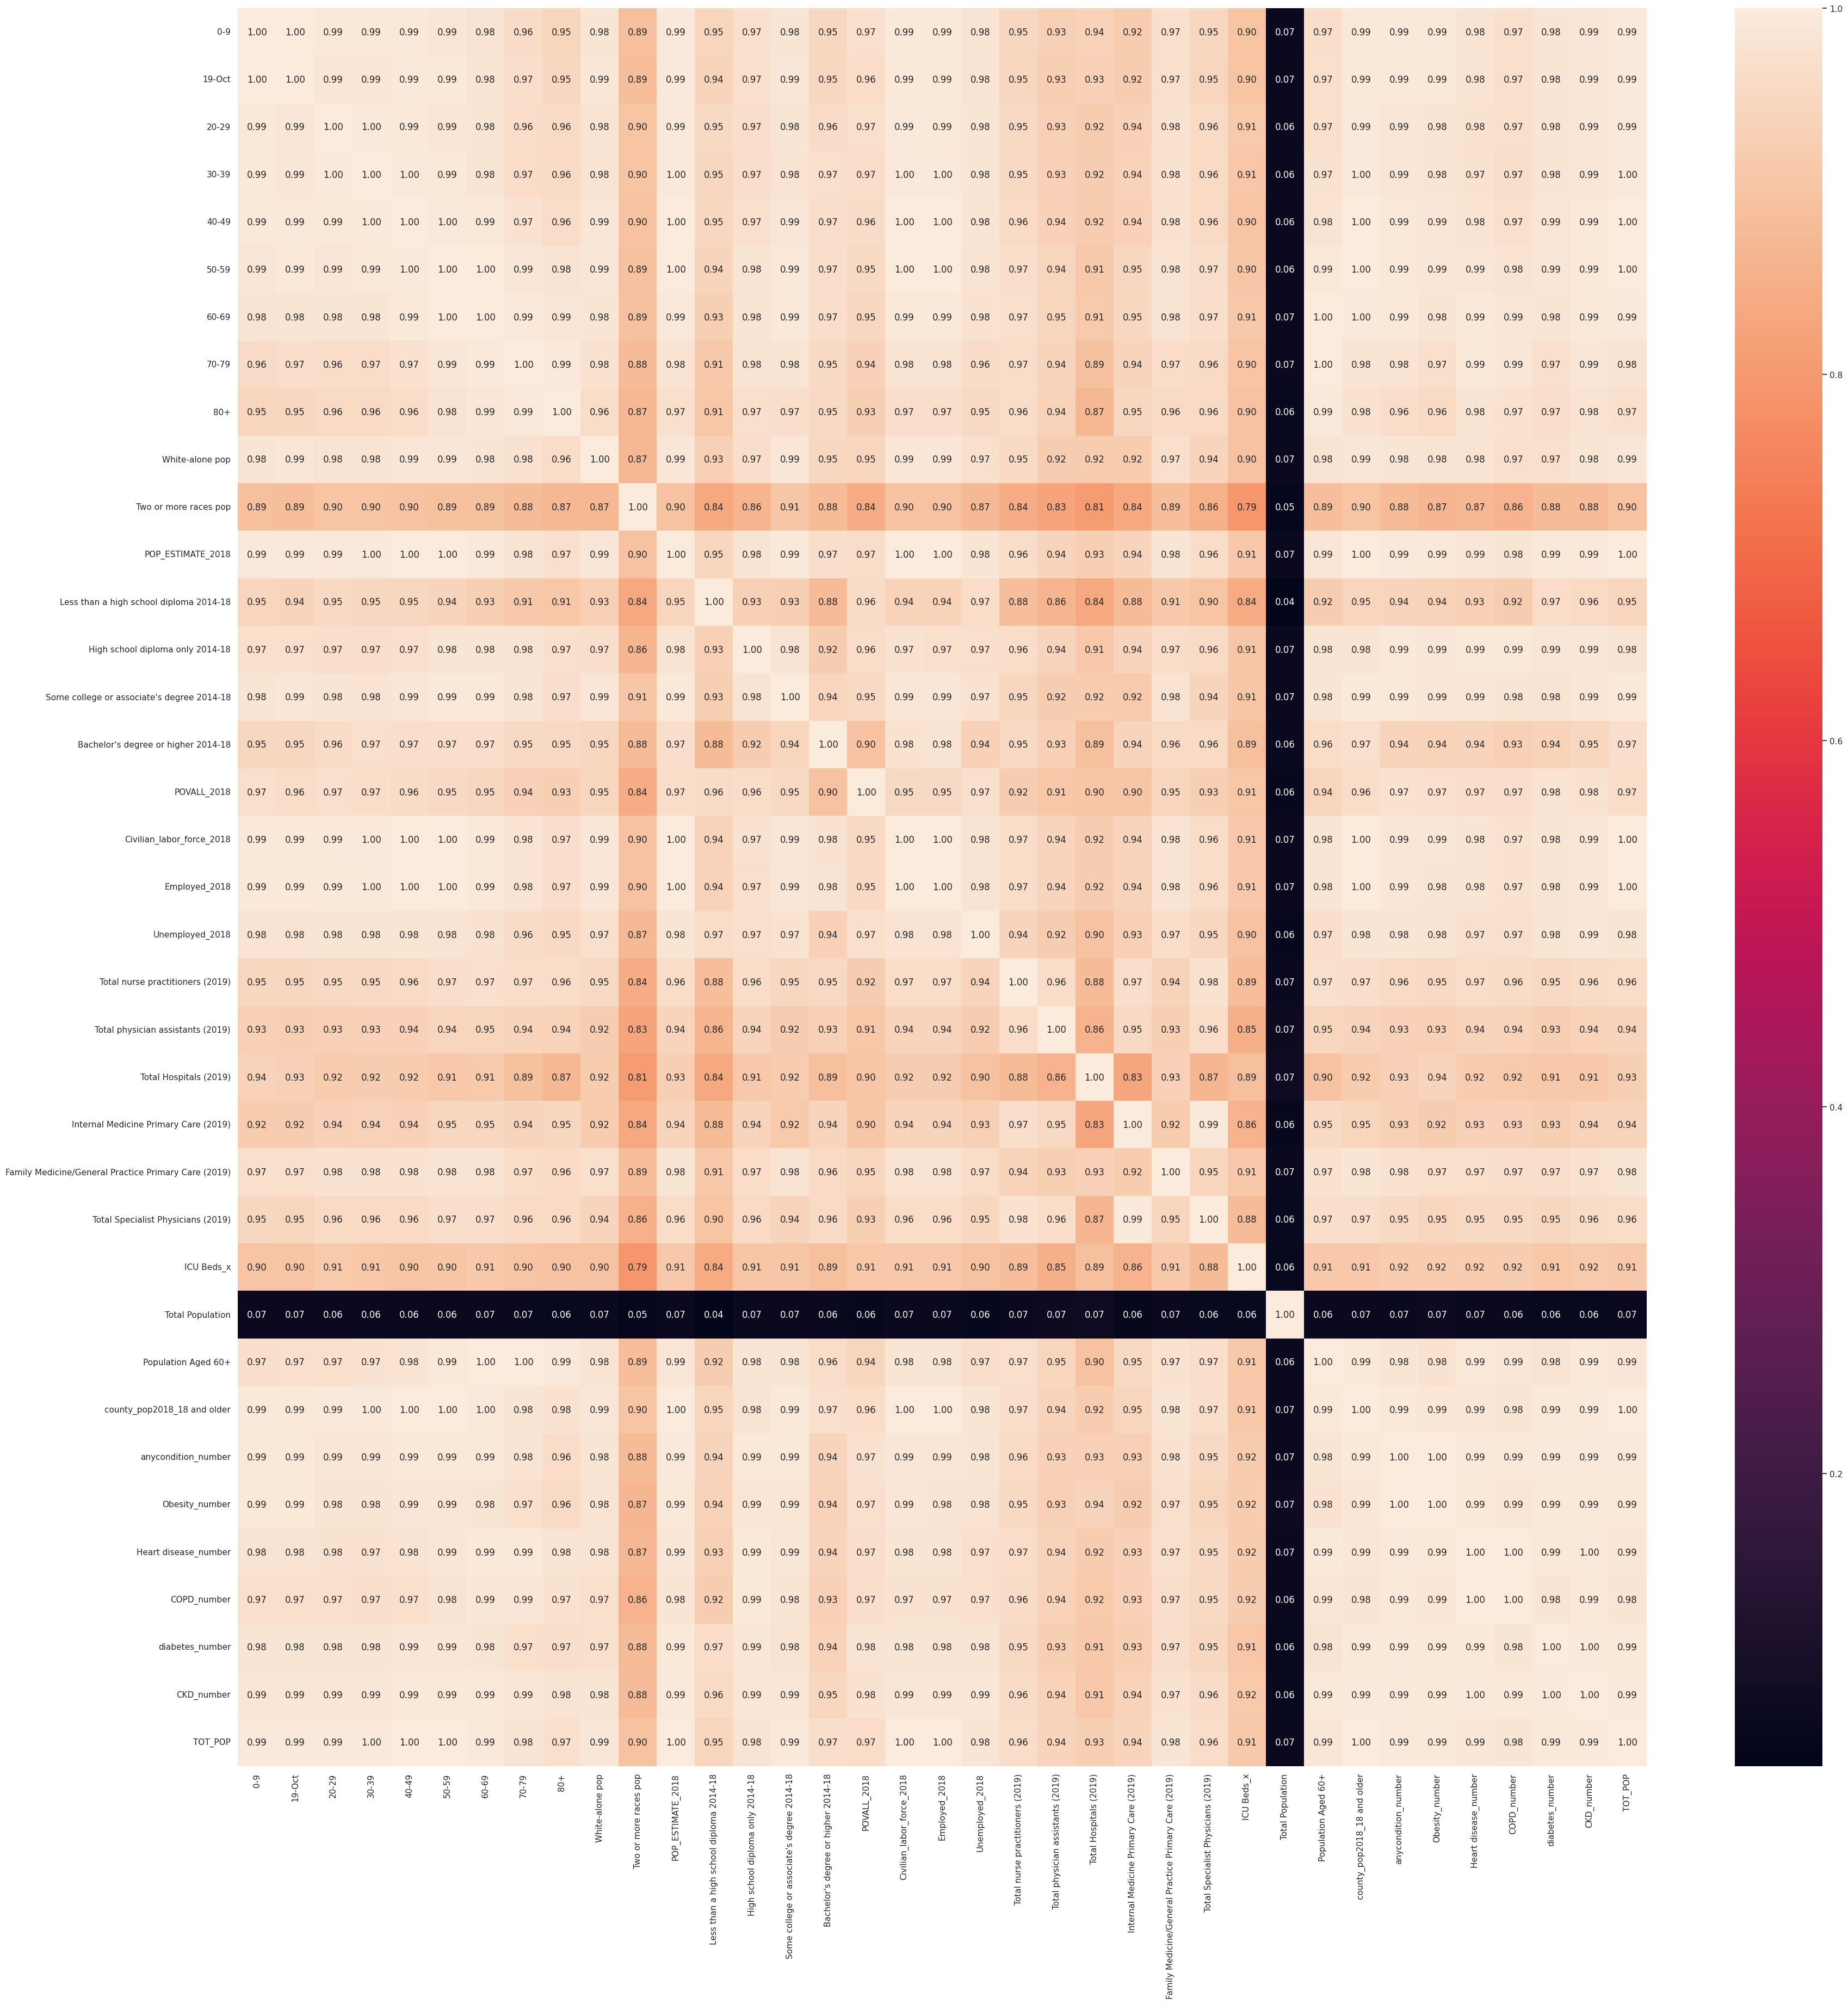

In [15]:
fig, axis = plt.subplots(figsize = (37, 37))


#sns.heatmap(total_data['0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79','80+', 'White-alone pop', 'Two or more races pop', 'GQ_ESTIMATES_2018','Less than a high school diploma 2014-18','High school diploma only 2014-18','Some college or associate's degree 2014-18','Bachelor's degree or higher 2014-18', 'POVALL_2018','Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018','Total nurse practitioners (2019)', 'Total physician assistants (2019)','Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)','Family Medicine/General Practice Primary Care (2019)','Total Specialist Physicians (2019)', 'ICU Beds_x', 'Total Population','Population Aged 60+', 'county_pop2018_18 and older','anycondition_number', 'Obesity_number', 'Heart disease_number','COPD_number', 'diabetes_number', 'CKD_number', 'POP_TOT'].corr(), annot = True, fmt = ".2f")

sns.heatmap(total_data[['0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+',
                       'White-alone pop', 'Two or more races pop', 'POP_ESTIMATE_2018',
                       'Less than a high school diploma 2014-18', 'High school diploma only 2014-18',
                       "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18",
                       'POVALL_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
                       'Total nurse practitioners (2019)', 'Total physician assistants (2019)',
                       'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)',
                       'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)',
                       'ICU Beds_x', 'Total Population', 'Population Aged 60+', 'county_pop2018_18 and older',
                       'anycondition_number', 'Obesity_number', 'Heart disease_number', 'COPD_number',
                       'diabetes_number', 'CKD_number', 'TOT_POP']].corr(), annot=True, fmt=".2f")

plt.tight_layout()

plt.show()

bastante correlación, salvo en la target...espero al feature selection 

hargo pairplot

In [1]:
sns.pairplot(data= total_data)

NameError: name 'sns' is not defined

El pairplot no funciona, me da la impresion que con tantas variables se bloquea, sigo 

DIA 2: FEATURE ENGENIERING 

analizar outliers 

In [18]:
total_data.describe()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,ICU Beds_x,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Total Population
count,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,...,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03
mean,1.041894e+05,1.274030e+04,1.336798e+04,1.446933e+04,1.391649e+04,1.288521e+04,1.363803e+04,1.191621e+04,7220.310510,4035.541720,...,23.817516,2.132298e+04,8.081460e+04,3.338540e+04,2.527613e+04,5597.593312,5827.242357,9326.577707,2466.234076,1.009802e+05
std,3.335834e+05,4.180730e+04,4.228439e+04,4.957773e+04,4.899095e+04,4.347219e+04,4.272063e+04,3.451858e+04,20287.498429,12063.782251,...,84.602028,6.140588e+04,2.585190e+05,9.888669e+04,7.446684e+04,15615.285499,15720.551934,29754.601185,7730.422067,3.150516e+05
min,8.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,4.000000e+00,1.400000e+01,2.000000e+01,6.000000,0.000000,...,0.000000,2.700000e+01,8.800000e+01,4.100000e+01,2.500000e+01,7.000000,7.000000,11.000000,3.000000,8.600000e+01
25%,1.096325e+04,1.280500e+03,1.374500e+03,1.263750e+03,1.232750e+03,1.245250e+03,1.483000e+03,1.476500e+03,950.750000,533.000000,...,0.000000,2.814750e+03,8.460250e+03,4.215000e+03,3.075000e+03,798.500000,815.000000,1187.750000,314.750000,1.089775e+04
50%,2.580050e+04,3.057000e+03,3.274000e+03,3.108000e+03,3.000500e+03,3.048500e+03,3.515500e+03,3.410000e+03,2177.000000,1160.000000,...,0.000000,6.310000e+03,2.023000e+04,9.753000e+03,7.182500e+03,1814.500000,1963.500000,2743.000000,718.000000,2.555450e+04
75%,6.791300e+04,8.097000e+03,8.822250e+03,8.976250e+03,8.314250e+03,8.120500e+03,9.157250e+03,8.710500e+03,5574.000000,2899.750000,...,12.000000,1.610625e+04,5.282025e+04,2.500125e+04,1.854250e+04,4376.000000,4727.000000,6679.250000,1776.250000,6.779325e+04
max,1.010552e+07,1.208253e+06,1.239139e+06,1.557073e+06,1.501844e+06,1.350076e+06,1.306003e+06,1.014325e+06,572530.000000,356275.000000,...,2126.000000,1.800341e+06,7.916625e+06,2.877316e+06,2.097906e+06,434790.000000,434075.000000,952335.000000,237766.000000,1.010572e+07


veamos si hay mucho outlier 

/tmp/ipykernel_1156/729512086.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


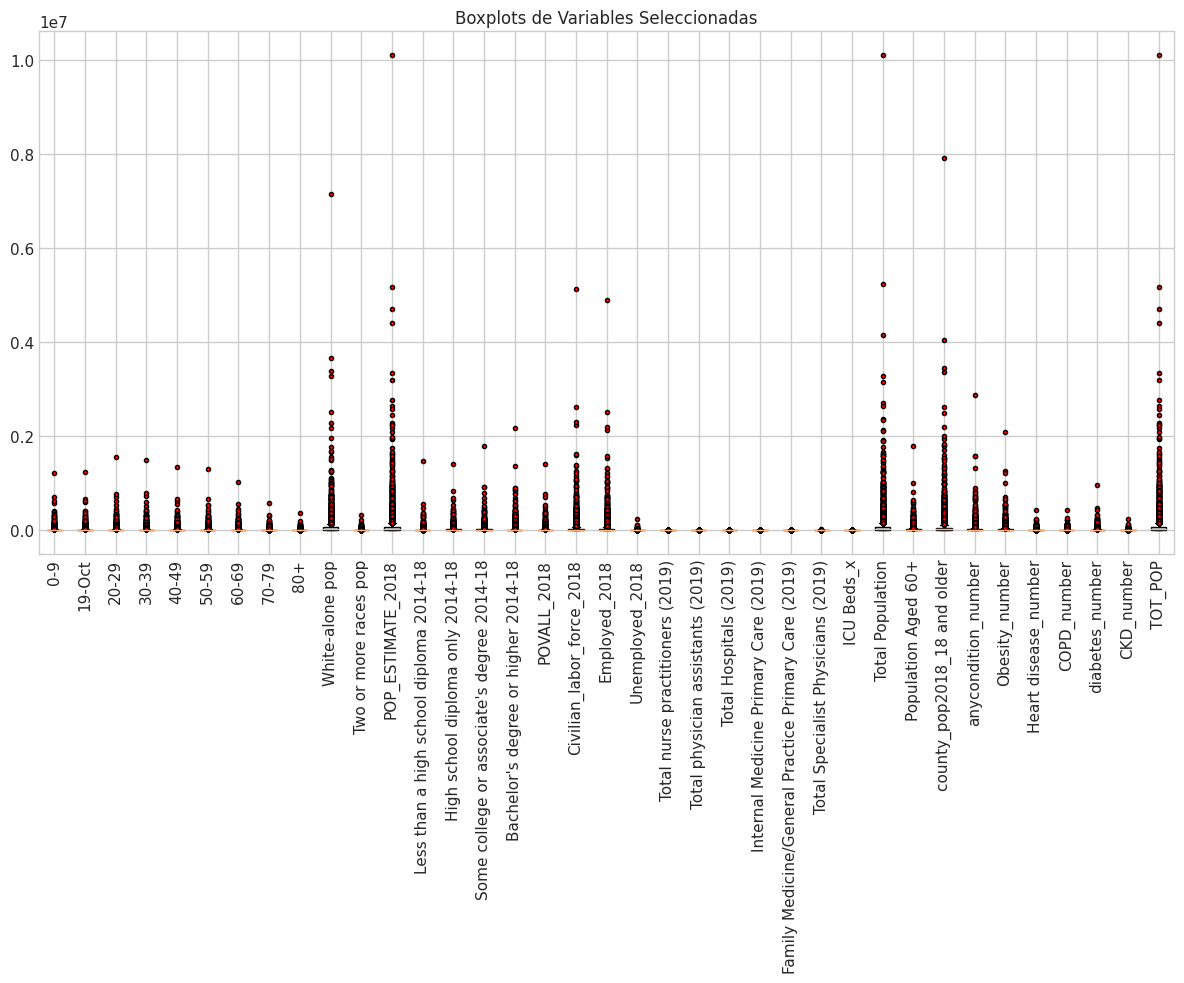

In [19]:
import matplotlib.pyplot as plt

# Lista de columnas para los boxplots
columnas_boxplots = ['0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+',
                     'White-alone pop', 'Two or more races pop', 'POP_ESTIMATE_2018',
                     'Less than a high school diploma 2014-18', 'High school diploma only 2014-18',
                     "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18",
                     'POVALL_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
                     'Total nurse practitioners (2019)', 'Total physician assistants (2019)',
                     'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)',
                     'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)',
                     'ICU Beds_x', 'Total Population', 'Population Aged 60+', 'county_pop2018_18 and older',
                     'anycondition_number', 'Obesity_number', 'Heart disease_number', 'COPD_number',
                     'diabetes_number', 'CKD_number', 'TOT_POP']

# Configurar estilo del gráfico con Seaborn
plt.figure(figsize=(12, 10))
plt.style.use("seaborn-whitegrid")

# Crear boxplots para las variables seleccionadas
boxplot = plt.boxplot(total_data[columnas_boxplots], sym='o', patch_artist=True)
plt.xticks(range(1, len(columnas_boxplots) + 1), columnas_boxplots, rotation=90)
plt.title("Boxplots de Variables Seleccionadas")

# Estilo para los boxplots
for box in boxplot['boxes']:
    box.set(facecolor="lightblue", linewidth=1, edgecolor="black")

# Estilo para los outliers
for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=3, markerfacecolor="red")

plt.tight_layout()
plt.show()



parece que si sigue habiendo outliers. Los dejo. 

analisis de los valores faltantes 

In [20]:
total_data.isnull()
total_data.isnull().sum()


TOT_POP                                                 0
0-9                                                     0
19-Oct                                                  0
20-29                                                   0
30-39                                                   0
40-49                                                   0
50-59                                                   0
60-69                                                   0
70-79                                                   0
80+                                                     0
White-alone pop                                         0
Two or more races pop                                   0
POP_ESTIMATE_2018                                       0
Less than a high school diploma 2014-18                 0
High school diploma only 2014-18                        0
Some college or associate's degree 2014-18              0
Bachelor's degree or higher 2014-18                     0
POVALL_2018   

no hay 

ESCALADO DE VALORES

In [21]:
total_data_num = total_data[['0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+',
                     'White-alone pop', 'Two or more races pop', 'POP_ESTIMATE_2018',
                     'Less than a high school diploma 2014-18', 'High school diploma only 2014-18',
                     "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18",
                     'POVALL_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
                     'Total nurse practitioners (2019)', 'Total physician assistants (2019)',
                     'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)',
                     'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)',
                     'ICU Beds_x', 'Total Population', 'Population Aged 60+', 'county_pop2018_18 and older',
                     'anycondition_number', 'Obesity_number', 'Heart disease_number', 'COPD_number',
                     'diabetes_number', 'CKD_number', 'TOT_POP'
]]


from sklearn.preprocessing import MinMaxScaler

In [22]:
from sklearn.preprocessing import MinMaxScaler
norm_model = MinMaxScaler()

predict_variables = ['0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+',
                     'White-alone pop', 'Two or more races pop', 'POP_ESTIMATE_2018',
                     'Less than a high school diploma 2014-18', 'High school diploma only 2014-18',
                     "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18",
                     'POVALL_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
                     'Total nurse practitioners (2019)', 'Total physician assistants (2019)',
                     'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)',
                     'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)',
                     'ICU Beds_x', 'Population Aged 60+', 'county_pop2018_18 and older',
                     'anycondition_number', 'Obesity_number', 'Heart disease_number', 'COPD_number',
                     'diabetes_number', 'CKD_number', 'TOT_POP']
#####MUY IMPORTANTE NO SE NORMALIZA LA TARGET
total_data_norm = norm_model.fit_transform(total_data_num[predict_variables])
total_data_norm = pd.DataFrame(total_data_norm, index = total_data_num.index, columns = predict_variables)
total_data_norm["Total Population"] = total_data_num["Total Population"]
total_data_norm

,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,...,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,TOT_POP,Total Population
0,0.002666,0.002795,0.001877,0.001876,0.002094,0.002923,0.003786,0.004286,0.003391,0.003536,...,0.003994,0.002584,0.003535,0.003768,0.004749,0.005315,0.002953,0.003230,0.002626,55036
1,0.004363,0.004641,0.003299,0.003549,0.004352,0.006027,0.008135,0.008375,0.008218,0.006941,...,0.008457,0.005206,0.006687,0.006525,0.008715,0.009422,0.005676,0.006103,0.005064,203360
2,0.003240,0.004130,0.003983,0.002898,0.003294,0.003900,0.004268,0.004728,0.004381,0.004925,...,0.004461,0.003826,0.004950,0.004868,0.005094,0.006416,0.003872,0.003651,0.003730,26201
3,0.009239,0.010205,0.007447,0.007555,0.008474,0.009770,0.010619,0.011755,0.009762,0.009675,...,0.010805,0.008895,0.011475,0.012255,0.012597,0.013152,0.008298,0.008895,0.009094,22580
4,0.013820,0.014257,0.011098,0.010642,0.011733,0.013758,0.016651,0.017585,0.016950,0.015326,...,0.017330,0.013086,0.017278,0.018522,0.019962,0.023026,0.013626,0.014666,0.013300,57667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,0.002954,0.003083,0.001943,0.002317,0.002592,0.003165,0.003520,0.003773,0.003315,0.003856,...,0.003508,0.002728,0.003086,0.003420,0.003277,0.002806,0.002205,0.002545,0.002811,27810
3136,0.000490,0.000540,0.000381,0.000413,0.000453,0.000661,0.000860,0.001003,0.000814,0.000774,...,0.000904,0.000569,0.000709,0.000704,0.000846,0.000926,0.000538,0.000606,0.000559,5771
3137,0.003449,0.004093,0.003198,0.003161,0.003741,0.004433,0.005547,0.005834,0.006007,0.005454,...,0.005772,0.004144,0.005458,0.005806,0.006410,0.007100,0.004212,0.004610,0.004045,42070
3138,0.010000,0.010711,0.008666,0.007527,0.008365,0.010003,0.011871,0.012478,0.010820,0.008050,...,0.011810,0.009555,0.013830,0.014103,0.015116,0.016617,0.011922,0.011225,0.009650,97887


                                        DIA 3

SELECCION DE CARACTERISTICAS 

In [23]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

# Dividimos el conjuno de datos en entrenamiento (train) y pruebas (test)
X = total_data_norm.drop("Total Population", axis = 1)
y = total_data_norm["Total Population"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Con un valor de k = 30 queremos decir implícitamente que queremos eliminar 6 características del conjunto de datos
selection_model = SelectKBest(chi2, k = 36)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,...,ICU Beds_x,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,TOT_POP
0,0.022957,0.021789,0.015634,0.018612,0.017710,0.017133,0.016637,0.016134,0.013964,0.022938,...,0.003763,0.014952,0.016904,0.019844,0.023605,0.014982,0.014666,0.011300,0.012525,0.018245
1,0.020490,0.021719,0.015143,0.016781,0.020246,0.022950,0.029490,0.036557,0.026294,0.026607,...,0.023989,0.029713,0.021578,0.023894,0.024184,0.030836,0.033831,0.021536,0.023031,0.021566
2,0.004768,0.005640,0.004379,0.004569,0.005395,0.006544,0.008234,0.008407,0.007463,0.007785,...,0.006585,0.008367,0.005953,0.005567,0.005502,0.007153,0.007162,0.004374,0.005598,0.005745
3,0.010016,0.010180,0.005653,0.006955,0.007031,0.005364,0.005295,0.004756,0.003638,0.009205,...,0.001881,0.004590,0.005938,0.007250,0.008789,0.004979,0.005303,0.004564,0.004572,0.006909
4,0.004363,0.004216,0.003413,0.003477,0.003095,0.003718,0.004489,0.004534,0.005737,0.004863,...,0.004704,0.004790,0.003766,0.004672,0.005333,0.004945,0.003898,0.003218,0.003668,0.003882


ahora guardo 

In [24]:
X_train_sel["Total Population"] = list(y_train)
X_test_sel["Total Population"] = list(y_test)

In [25]:
X_train_sel.to_csv("/workspaces/joseVent-linearregular/data/processed/clean_medicaldist_train.csv", index=False)
X_test_sel.to_csv("/workspaces/joseVent-linearregular/data/processed/clean_medicaldist_test.csv", index=False)

: 